# Overture (mod1-part0)

## Coin Flipping Problem

$\theta$ is the *bias* in the coin flipping problem: if it is a fair coin you'd get 0.5; you want to infer the actual bias from observations. 

You toss the coin N times. 
Let's define with $y$ the number of occurrences of heads, and $\theta$ be the (true) probability of getting a head from the coin. 

The following is a [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution): 

$$
p(y|\theta,N) = \frac{N!}{y!(N-y)!}\theta^{y}(1-\theta)^{N-y} 
$$

We will use [scipy.stats.binom](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html) for the binomial distribution.

<br/><br/>

**Other references**

pmf: [probability mass function](https://en.wikipedia.org/wiki/Probability_mass_function)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import arviz as az


In [42]:
az.style.use('arviz-darkgrid') #beautify plots with dark grid background and font size

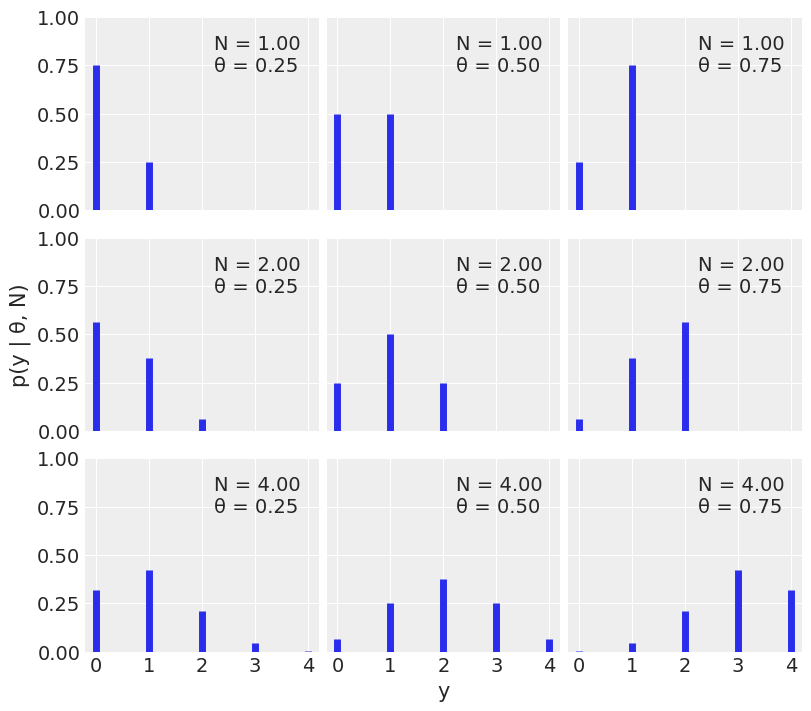

In [41]:

n_params = [1, 2, 4]  # Number of trials
p_params = [0.25, 0.5, 0.75]  # Probability of success

x = np.arange(0, max(n_params)+1)


_,ax = plt.subplots(len(n_params), len(p_params), sharex=True, sharey=True,
                    figsize=(8, 7), constrained_layout=True)

for i in range(len(n_params)):
    for j in range(len(p_params)):
        n = n_params[i]
        p = p_params[j]

        y = stats.binom(n=n, p=p).pmf(x) 

        ax[i,j].vlines(x, 0, y, colors='C0', lw=5)
        ax[i,j].set_ylim(0, 1)
        ax[i,j].plot(0, 0, label="N = {:3.2f}\nθ = {:3.2f}".format(n,p), alpha=0)
        ax[i,j].legend()


ax[2,1].set_xlabel('y')
ax[1,0].set_ylabel('p(y | θ, N)')
ax[0,0].set_xticks(x)


plt.savefig('./output/B11197_01_03.png', dpi=400)


<div class="alert alert-block alert-info" style="background-color: white; border: 2px solid; padding: 10px">
    <b><i class="fa fa-info-circle" aria-hidden="true"></i>&nbsp; Note</b><br>
    <p style="color: black">
        Notice that for discrete distributions, the sum of the heights correspond to actual probabilities.
    </p>
</div>

<code> A Binomial distribution for this problem is a reasonable choice for the likelihood. If we know the value of $\theta$, we can calculate the expected distribution of heads. 
</code>

<div class="alert alert-block alert-info" style="background-color: white; border: 2px solid; padding: 10px">
    <b><i class="fa fa-info-circle" aria-hidden="true"></i>&nbsp; Note</b><br>
    <p style="color: black">
        The problem is that you may not know the true value of \theta (for example, if the coin is not fair)! But here comes the Bayesian reasoning approach: any time you do not know the value of a parameter, we put a prior on it. 
    </p>
</div>


<div class="alert alert-block alert-info" style="background-color: white; border: 2px solid; padding: 10px">
    <b><i class="fa fa-question-circle" aria-hidden="true"></i>&nbsp; Question</b><br>
    <p style="color: black">
        What happens to a posterior if your prior is a Dirac delta distribution? (notice the space of $\theta$ is continuous.)
    </p>
</div>

## Choosing the Prior

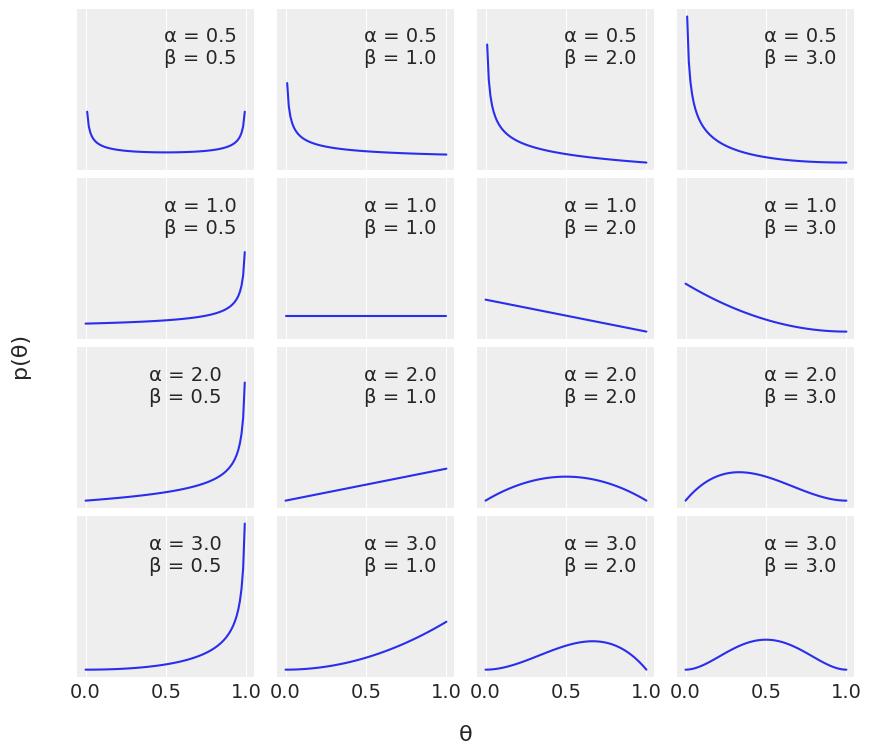

In [58]:
params = [0.5, 1, 2, 3]
x = np.linspace(0, 1, 100)
f, ax = plt.subplots(len(params), len(params), sharex=True, sharey=True,
                     figsize=(8, 7), constrained_layout=True)
for i in range(4):
    for j in range(4):
        a = params[i]
        b = params[j]
        y = stats.beta(a, b).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot(0, 0, label="α = {:2.1f}\nβ = {:2.1f}".format(a, b), alpha=0)
        ax[i,j].legend()
ax[1,0].set_yticks([])
ax[3,0].set_xticks([0, 0.5, 1])
f.text(0.5, -0.05, 'θ', ha='center', size=16)
f.text(-0.07, 0.5, 'p(θ)', va='center', rotation=90, size=16)
plt.savefig('./output/B11197_01_04.png', dpi=400)

<div class="alert alert-block alert-info" style="background-color: white; border: 2px solid; padding: 10px">
    <b><i class="fa fa-info-circle" aria-hidden="true"></i>&nbsp; Note</b><br>
    <p style="color: black">
        Text. 
    </p>
</div>

### Getting the posterior

### Computing and plotting the posterior

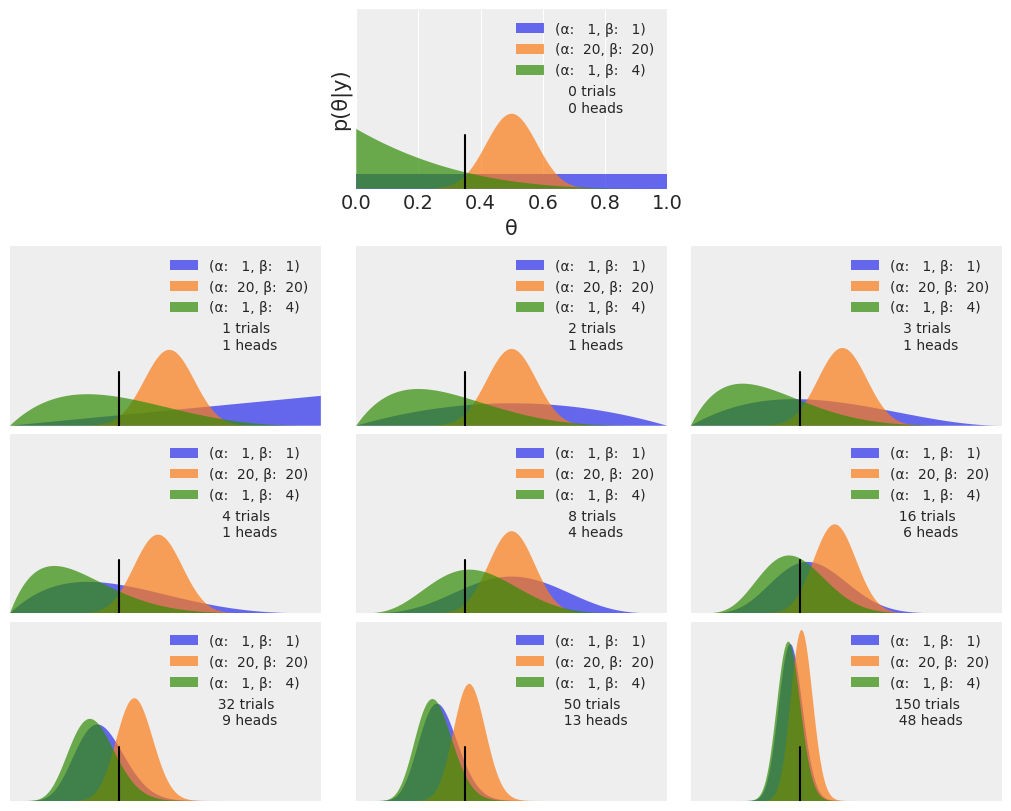

In [118]:
plt.figure(figsize=(10, 8))


n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

#------ replace with actual generation from binomial with theta_real ------#
rep_data = []
for nn in n_trials:
    rep_data.append(stats.binom.rvs(nn, theta_real))  #rvs: random variates
#--------------------------------------------------------------------------#

#data = rep_data

beta_params = [(1, 1), (20, 20), (1, 4)]

dist = stats.beta  
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html

x = np.linspace(0, 1, 200)

colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
        plt.ylabel('p(θ|y)')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = data[idx]
    for idx2, (a_prior, b_prior) in enumerate(beta_params):
        tmp_color = colors[idx2]
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.fill_between(x, 0, p_theta_given_y,alpha=0.7,
                         label=f'(α: {a_prior:3d}, β: {b_prior:3d})')
        
        
    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend(fontsize=10)
    plt.yticks([])
    

    #print("")
#plt.tight_layout() #check compatibility 
plt.savefig('./output/B11197_01_05.png', dpi=300)


<div class="alert alert-block alert-info" style="background-color: white; border: 2px solid; padding: 10px">
    <b><i class="fa fa-info-circle" aria-hidden="true"></i>&nbsp; Note</b><br>
    <p style="color: black">
        PMF uses discrete random variables. PDF uses continuous random variables.  
    </p>
</div>


## Binomial 

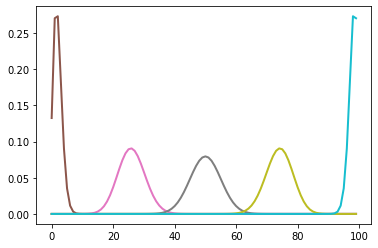

In [24]:
n=100
p=np.linspace(0.02,0.98,5)

plt.figure()
for i,valp in enumerate(p):
   
    tstr = 'C'+str(i+5)
    x=np.arange(0,n)
    y=stats.binom.pmf(x, n, valp)
    
    #fig, ax = plt.subplots()

    plt.plot(x, y, linewidth=2.0,color=tstr)